In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Arm segment lengths
l1 = 3
l2 = 2.5
l3 = 1  # Equal lengths for simplicity

In [2]:
# Inverse Kinematics calculation
def inverse_kinematics(x, y):
    # Calculate the distance from the base to the target point
    r = np.sqrt(x**2 + y**2)

    # Adjust target point for the third segment
    r_adj = r - l3

    # Calculate angles using the Law of Cosines
    cos_angle2 = (r_adj**2 - l1**2 - l2**2) / (2 * l1 * l2)
    angle2 = np.arccos(np.clip(cos_angle2, -1, 1))  # Joint angle at B

    # Calculate the angle for the first joint
    k1 = l1 + l2 * np.cos(angle2)
    k2 = l2 * np.sin(angle2)
    angle1 = np.arctan2(y, x) - np.arctan2(k2, k1)  # Joint angle at A

    # For simplicity, we'll set the angle of the third segment
    # so it always points directly at the target.
    angle3 = np.arctan2(y, x) - angle1 - angle2  # Joint angle at C

    return np.degrees(angle1), np.degrees(angle2), np.degrees(angle3)

In [3]:
# Test the inverse kinematics with a target position
target_x, target_y = 2, 1
angles = inverse_kinematics(target_x, target_y)
angles

(-28.208407348490244, 156.1786261005377, -101.40516757496948)

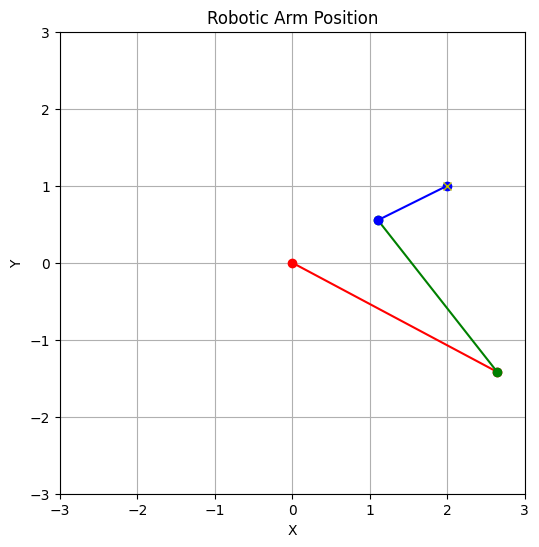

In [4]:
def plot_arm(angles):
    angle1, angle2, angle3 = np.radians(angles)

    # Calculate joint positions
    joint1 = (l1 * np.cos(angle1), l1 * np.sin(angle1))
    joint2 = (joint1[0] + l2 * np.cos(angle1 + angle2), joint1[1] + l2 * np.sin(angle1 + angle2))
    effector = (joint2[0] + l3 * np.cos(angle1 + angle2 + angle3), joint2[1] + l3 * np.sin(angle1 + angle2 + angle3))

    # Plot base, joints, and links
    plt.figure(figsize=(6, 6))
    plt.plot([0, joint1[0]], [0, joint1[1]], 'ro-')  # Base to joint1
    plt.plot([joint1[0], joint2[0]], [joint1[1], joint2[1]], 'go-')  # joint1 to joint2
    plt.plot([joint2[0], effector[0]], [joint2[1], effector[1]], 'bo-')  # joint2 to effector
    plt.plot(target_x, target_y, 'yx')  # Target position

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Robotic Arm Position')
    plt.grid(True)
    plt.show()

plot_arm(angles)